In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from collections import deque

In [5]:
data = pd.read_pickle('..//data//clean_data.pkl')
raw_data = pd.read_pickle('..//data//raw_data.pkl')

In [6]:
class InvestReturn():
    """portfolio pandas df or series"""
    
    def __init__(self, portfolio, start_value = 100):
        self.portfolio = portfolio
        self.start_value = start_value
        
    def run(self):
        self.result = list()
        
        assets = self.start_value
        
        self.result.append(assets)
        for r in self.portfolio:
        
            assets = assets * (1+r)
            self.result.append(assets)
            
        return pd.Series(self.result[1:], index=self.portfolio.index)
    
    def plot(self):
        d = self.run()
        plt.plot(d)
        
    def log_run(self):
        d = self.run()
        return np.log(d)

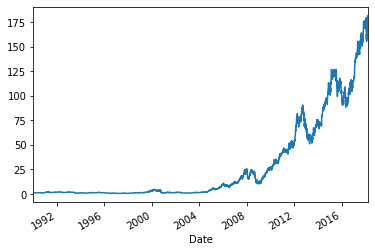

In [8]:
raw_data['AAPL'].plot()

In [18]:
rr = raw_data['AAPL'].pct_change()

In [19]:
rr

Date
1990-01-02         NaN
1990-01-03    0.006711
1990-01-04    0.003467
1990-01-05    0.003189
1990-01-08    0.006623
                ...   
2018-03-21   -0.022655
2018-03-22   -0.014159
2018-03-23   -0.023128
2018-03-26    0.047472
2018-03-27   -0.025641
Name: AAPL, Length: 7114, dtype: float64

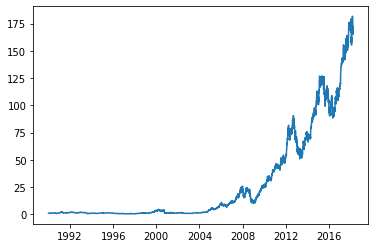

In [23]:
InvestReturn(rr[1:], start_value=raw_data['AAPL'][0]).plot()

In [11]:
sv, ev = raw_data['AAPL'][0], raw_data['AAPL'][-1]

In [14]:
ev / sv

150.55991701132564